<a href="https://colab.research.google.com/github/Yessirskii1/Machine-Learning/blob/main/ML_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Employeers_data.csv')

df.columns = df.columns.str.strip().str.replace(' ', '_')
df.columns

df.head()

,id,age,Sex,Occupation,Field,Working_Hours,Package,Job_Type,Company_Type,Marital_Status,Location,Cerifications,Education_level,Bonus,Allowances,OverTime_Pay,Salary_Per_Month
0,1,70,Female,Intermediate,CA,1 Hr,6 LPA,Remote,Non-Profit / NGO,Divorced,Metro,CFA (Chartered Financial Analyst),Professional Certification,"₹5,000 - ₹20,000",Medical Allowance,₹200/hour,77000 Rs
1,2,41,Male,Working professional,CA,3 Hr,27 LPA,Remote,Consultancy Firm,Divorced,Rural,AWS Certified Solutions Architect,Professional Certification,No Bonus,Multiple Allowances,₹300/hour,41000 Rs
2,3,33,Female,Intermediate,Finance,7 Hr,30 LPA,Remote,Outsourcing / Service-based Company,Single,City,Certified Data Scientist,Diploma,No Bonus,Medical Allowance,Compensatory Off (No extra pay),35000 Rs
3,4,50,Male,Experienced,CA,4 Hr,14 LPA,Hybrid,Contract / Temporary Employment,Married,Rural,TensorFlow Developer Certificate,Bachelor's Degree,No Bonus,Internet Allowance,No Overtime,95000 Rs
4,5,47,Female,Working professional,CA,4 Hr,17 LPA,Hybrid,Small Business / Local Firm,Single,City,CFA (Chartered Financial Analyst),High School,"₹20,000 - ₹50,000",Multiple Allowances,₹300/hour,145000 Rs


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                10000 non-null  int64 
 1   age               10000 non-null  int64 
 2   Sex               10000 non-null  object
 3   Occupation        10000 non-null  object
 4   Field             10000 non-null  object
 5   Working_Hours     10000 non-null  object
 6   Package           10000 non-null  object
 7   Job_Type          10000 non-null  object
 8   Company_Type      10000 non-null  object
 9   Marital_Status    10000 non-null  object
 10  Location          10000 non-null  object
 11  Cerifications     10000 non-null  object
 12  Education_level   10000 non-null  object
 13  Bonus             10000 non-null  object
 14  Allowances        8672 non-null   object
 15  OverTime_Pay      10000 non-null  object
 16  Salary_Per_Month  10000 non-null  object
dtypes: int64(2), 

In [5]:
#смотрим кол-во признаков в каждом  признаке в %.
(df.isna().mean() * 100).sort_values(ascending=False)


,0
Allowances,13.28
id,0.00
age,0.00
Occupation,0.00
Sex,0.00
Working_Hours,0.00
Package,0.00
Job_Type,0.00
Field,0.00
Company_Type,0.00


In [6]:
#делаем целевую переменную числовой
df['Salary_Per_Month_num'] = (
    df['Salary_Per_Month']
      .astype(str)
      .str.replace('Rs', '', regex=False)
      .str.replace(',', '', regex=False)
      .str.strip()
)

df['Salary_Per_Month_num'] = pd.to_numeric(df['Salary_Per_Month_num'], errors='coerce')

df[['Salary_Per_Month', 'Salary_Per_Month_num']].head()


,Salary_Per_Month,Salary_Per_Month_num
0,77000 Rs,77000
1,41000 Rs,41000
2,35000 Rs,35000
3,95000 Rs,95000
4,145000 Rs,145000


In [7]:
y = df['Salary_Per_Month_num']

# Числовое описание целевой переменной
y.describe()


,Salary_Per_Month_num
count,10000.000000
mean,87534.000000
std,36229.365171
min,25000.000000
25%,57000.000000
50%,87000.000000
75%,119000.000000
max,149000.000000


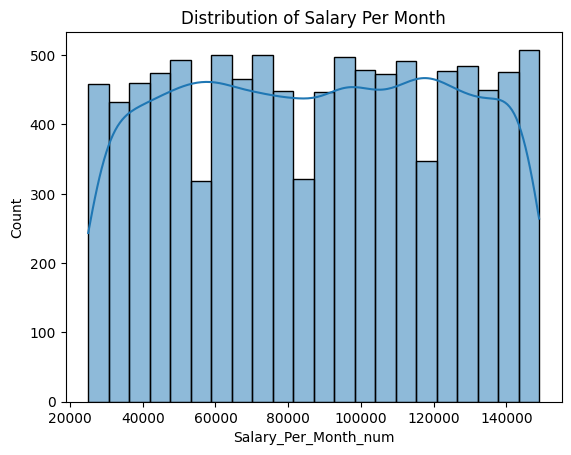

In [8]:
# Гистограмма распределения Y
plt.figure()
sns.histplot(y, kde=True)
plt.title('Distribution of Salary Per Month')
plt.show()

# Вывод: Зарплаты лежат примерно в диапазоне 25000-150000.
# Столбцы по высоте находятся примерно на одном уровне, что говорит о равномерном распределении.

In [9]:
# переводим рабочие часы из строки в число
df['Working_Hours_num'] = (
    df['Working_Hours']
      .astype(str)
      .str.replace('Hr', '', regex=False)
      .str.strip()
)
df['Working_Hours_num'] = pd.to_numeric(df['Working_Hours_num'], errors='coerce')

# переводим компесанцию из строки в число
df['Package_num'] = (
    df['Package']
      .astype(str)
      .str.replace('LPA', '', regex=False)
      .str.strip()
)
df['Package_num'] = pd.to_numeric(df['Package_num'], errors='coerce')

# проверим, что получилось
df[['Working_Hours', 'Working_Hours_num', 'Package', 'Package_num']].head(10)


,Working_Hours,Working_Hours_num,Package,Package_num
0,1 Hr,1,6 LPA,6
1,3 Hr,3,27 LPA,27
2,7 Hr,7,30 LPA,30
3,4 Hr,4,14 LPA,14
4,4 Hr,4,17 LPA,17
5,4 Hr,4,14 LPA,14
6,9 Hr,9,27 LPA,27
7,5 Hr,5,7 LPA,7
8,3 Hr,3,29 LPA,29
9,2 Hr,2,20 LPA,20


In [10]:
num_cols = ['age', 'Working_Hours_num', 'Package_num', 'Salary_Per_Month_num']

corr = df[num_cols].corr()
corr


,age,Working_Hours_num,Package_num,Salary_Per_Month_num
age,1.000000,0.005588,0.011339,-0.006810
Working_Hours_num,0.005588,1.000000,-0.003873,0.013348
Package_num,0.011339,-0.003873,1.000000,-0.020396
Salary_Per_Month_num,-0.006810,0.013348,-0.020396,1.000000


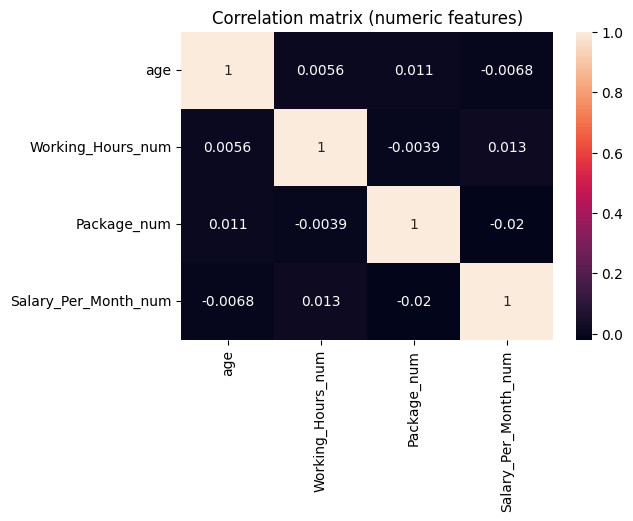

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True)
plt.title('Correlation matrix (numeric features)')
plt.show()

# Вывод: кореляция целевой переменной salary_per_month_num с выбранными признаками близка к нулю, что говорит о слабой линейной зависимости.

In [12]:
df.groupby('Job_Type')['Salary_Per_Month_num'].describe()

# Вывод: Медианная зарплата во всех группах одинакова , то есть выраженного влияния Job_Type на уровень заработной платы в данном датасете не наблюдается.

,count,mean,std,min,25%,50%,75%,max
Job_Type,,,,,,,,
Full-Time,3408.0,87134.389671,36186.381376,25000.0,57000.0,87000.0,117000.0,149000.0
Hybrid,3307.0,87583.610523,36367.609688,25000.0,57000.0,87000.0,119000.0,149000.0
Remote,3285.0,87898.630137,36141.264504,25000.0,57000.0,89000.0,119000.0,149000.0


In [13]:
df.groupby('Education_level')['Salary_Per_Month_num'].describe()

# Вывод: Медианные значения зарплаты немного различаются между уровнями образования что указывает на наличие слабого-умеренного влияния.

,count,mean,std,min,25%,50%,75%,max
Education_level,,,,,,,,
Bachelor's Degree,1670.0,88116.167665,36708.815373,25000.0,55000.0,91000.0,119000.0,149000.0
Diploma,1714.0,85845.974329,36495.274244,25000.0,53500.0,85000.0,117000.0,149000.0
High School,1727.0,88701.215981,35611.898517,25000.0,59000.0,89000.0,119000.0,149000.0
Master's Degree,1610.0,87547.826087,35931.645774,25000.0,57000.0,89000.0,117000.0,149000.0
PhD,1640.0,86784.146341,36505.163473,25000.0,55000.0,86000.0,119000.0,149000.0
Professional Certification,1639.0,88212.934716,36092.987066,25000.0,57000.0,89000.0,120000.0,149000.0


In [14]:
df.groupby('Occupation')['Salary_Per_Month_num'].describe()

# Вывод: медианы почти одинаковы, мин и макс тоже почти одинаковы. Влияние Occupation на целевую переменную - слабое.

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
Experienced,2570.0,87479.377432,36240.972659,25000.0,57000.0,87000.0,119000.0,149000.0
Fresher,2448.0,87573.529412,36270.668697,25000.0,57000.0,87000.0,119000.0,149000.0
Intermediate,2491.0,87870.333200,36492.487633,25000.0,57000.0,89000.0,119000.0,149000.0
Working professional,2491.0,87215.174629,35930.257446,25000.0,57000.0,87000.0,117000.0,149000.0


In [15]:
df.groupby('Field')['Salary_Per_Month_num'].describe()

# Сильного влияния не видно.

,count,mean,std,min,25%,50%,75%,max
Field,,,,,,,,
CA,2503.0,86446.264483,35608.519145,25000.0,55000.0,87000.0,117000.0,149000.0
Digital marketing,2500.0,87847.200000,36189.585886,25000.0,57000.0,87000.0,119000.0,149000.0
Finance,2409.0,88210.460772,36319.676401,25000.0,57000.0,89000.0,121000.0,149000.0
IT,2588.0,87653.786708,36772.652656,25000.0,55000.0,89000.0,119000.0,149000.0


In [16]:
df.groupby('Company_Type')['Salary_Per_Month_num'].describe()
# Сильного влияния также не видно.

,count,mean,std,min,25%,50%,75%,max
Company_Type,,,,,,,,
Big MNC (Multinational Corporation),710.0,88684.507042,36123.306488,25000.0,59000.0,89000.0,121000.0,149000.0
Consultancy Firm,710.0,88678.873239,34553.912886,25000.0,61000.0,89000.0,117000.0,149000.0
Contract / Temporary Employment,767.0,87526.727510,37064.533414,25000.0,55000.0,89000.0,119000.0,149000.0
Freelancing / Self-employed,659.0,87033.383915,35302.325744,25000.0,57000.0,87000.0,117000.0,149000.0
Government Organization,707.0,86400.282885,36435.548279,25000.0,55000.0,83000.0,119000.0,149000.0
Large Enterprise,670.0,87614.925373,36891.847969,25000.0,57000.0,87000.0,119000.0,149000.0
Mid-sized Company,747.0,88617.135207,37459.942871,25000.0,55000.0,91000.0,121000.0,149000.0
Non-Profit / NGO,728.0,87626.373626,36631.372624,25000.0,56500.0,88000.0,119000.0,149000.0
Outsourcing / Service-based Company,704.0,88687.500000,36464.586573,25000.0,57000.0,89000.0,121000.0,149000.0


# **Вывод  анализа EDA.**

По результатам EDA явных предикторов зарплаты не выявлено: корреляции числовых признаков близки к нулю, а по категориальным признакам медианы зарплат почти совпадают.  Качество будет ограничено отсутствием информативных признаков.

В таких условиях в best_features возьмем характеристики которые "хоть немного" влияют на нашу целевую Salary_per_month и самые "осмысленные" (логичные) характеристики.


**Наш супер каст:**

best_features = ['age',  'Working_Hours_num',  'Package_num',  'Education_level',  'Job_type']




In [ ]:
best_features = ['age', 'Working_Hours_num', 'Package_num', 'Education_level', 'Job_Type']

x = df[best_features]
y = df['Salary_Per_Month_num']

# x.head()
y.head()

# print("\nСколько строк имеют хотя бы один пропуск в x или y:")
# display(((x.isna().any(axis=1)) | (y.isna())).sum())

,Salary_Per_Month_num
0,77000
1,41000
2,35000
3,95000
4,145000


In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['Education_level', 'Job_Type']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(X[cat_cols])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))

# Убираем исходные категориальные и добавляем закодированные
x_ready = pd.concat([X.drop(columns=cat_cols).reset_index(drop=True),
                     encoded_df.reset_index(drop=True)], axis=1)

x_ready.head()


,age,Working_Hours_num,Package_num,Education_level_Bachelor's Degree,Education_level_Diploma,Education_level_High School,Education_level_Master's Degree,Education_level_PhD,Education_level_Professional Certification,Job_Type_Full-Time,Job_Type_Hybrid,Job_Type_Remote
0,70,1,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,41,3,27,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,33,7,30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,50,4,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,47,4,17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_ready, y)       #модель учится на данных x_ready и y

y_pred_all = model.predict(X_ready)
y_pred_all[:10]


array([88537.42039363, 87326.31584558, 85475.67480007, 88114.29188969,
       88494.28192079, 88973.40426424, 88201.75748992, 89189.47552837,
       86971.6696347 , 87859.64593029])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y, y_pred_all)
rmse = mean_squared_error(y, y_pred_all) ** 0.5
r2 = r2_score(y, y_pred_all)

print("Метрики на всей выборке:")
print("MAE =", round(mae, 2))
print("RMSE =", round(rmse, 2))
print("R2 =", round(r2, 4))


Метрики на всей выборке:
MAE = 31368.76
RMSE = 36201.65
R2 = 0.0014


# Промежуточный вывод метрикам.

Полученные метрики являются ожидаемыми. На этапе (EDA) мне было понятно, что числовые признаки имеют корреляцию с целевой переменной, близкую к нулю, а при группировке по категориальным признакам медианные значения зарплаты между группами отличаются незначительно.


Поэтому линейная регрессия закономерно показывает низкое качество:

1) MAE = 31 368.76
Это означает, что в среднем предсказанная зарплата отличается от реальной примерно на 31.4 тыс. Rs.

2) RMSE = 36 201.65
То что RMSE заметно больше MAE, говорит о том, что у модели не все ошибки равномерны.

3) R2 = 0.0014
Это означает, что модель почти не находит закономерностей между признаками и зарплатой и предсказывает значения примерно “в районе среднего”, не умея хорошо отличать высокие зарплаты от низких.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_ready, y, test_size=0.2, random_state=42
)

print("Размер X:", X_ready.shape)                                            #всего
print("Размер train:", X_train.shape, "Размер y_train:", y_train.shape)      #ренируемся
print("Размер test:", X_test.shape, "Размер y_test:", y_test.shape)          #тестируемся


Размер X: (10000, 12)
Размер train: (8000, 12) Размер y_train: (8000,)
Размер test: (2000, 12) Размер y_test: (2000,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)     #подбироаем коэф w и b

y_pred_train = model.predict(X_train)    #предсказываем на данных из 8000 сотрудников на которых учили
y_pred_test = model.predict(X_test)      #предсказываем на данных 2000 сотрудников которые модель еще не видела

print("Первые 5 предсказаний на TRAIN:", y_pred_train[:5])
print("Первые 5 предсказаний на TEST:", y_pred_test[:5])


Первые 5 предсказаний на TRAIN: [85307.43838044 88682.7842128  88731.57063465 89520.81524944
 86803.3081427 ]
Первые 5 предсказаний на TEST: [87563.9942118  86177.38128245 87674.79131286 85756.34815159
 88007.53042924]


# Микровывод
Даже по первым предсказаниям подтверждаем теорию о том что из за слабого влияния признаков линейная регрессия предсказывает "около-средние" значения. Что не есть хорошо, но работаем с тем что есть.

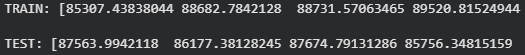

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

mae_train, rmse_train, r2_train = metrics(y_train, y_pred_train)
mae_test, rmse_test, r2_test = metrics(y_test, y_pred_test)

print("TRAIN:")
print("MAE =", round(mae_train, 2), "\nRMSE =", round(rmse_train, 2), "\nR2 =", round(r2_train, 4))

print("\n\nTEST:")
print("MAE =", round(mae_test, 2), "\nRMSE =", round(rmse_test, 2), "\nR2 =", round(r2_test, 4))


TRAIN:
MAE = 31414.26 
RMSE = 36222.88 
R2 = 0.0022


TEST:
MAE = 31190.49 
RMSE = 36147.96 
R2 = -0.0041


# **ФИНАЛЬНЫЙ** **ВЫВОД**

Данные были разделены на обучающую и тестовую выборки в пропорции 80/20. Модель линейной регрессии обучена на обучающей выборке и проверена на обучающей и тестовой.

Получены метрики:

    Train:
    MAE ≈ 31 414
    RMSE ≈ 36 223
    R² ≈ 0.0022.

    Test:
    MAE ≈ 31 190
    RMSE ≈ 36 148
    R² ≈ −0.0041.
Метрики на train и test близки, что говорит об отсутствии переобучения. При этом значения R² близки к нулю (на test отрицательное), следовательно модель практически не объясняет вариацию зарплаты и предсказывает почти на уровне среднего значения.

Такой результат является ожидаемым и согласуется с EDA: числовые признаки имеют корреляции с целевой переменной, близкие к нулю, а различия зарплат по категориальным признакам невелики.




Дополнительно, чтобы убедиться, что не упущены важные признаки, исследовал влияния других категориальных признаков на целевую переменную с помощью группировки groupby(...).describe()

Результат не впечатлил. Следовательно, оснований пересматривать ранее выбранный best_features нет. Его изменение не даст заметного улучшения предсказательной способности модели в рамках данного датасета.

In [20]:
df.groupby('Sex')['Salary_Per_Month_num'].describe()


,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,4999.0,87364.072815,36321.894079,25000.0,55000.0,87000.0,119000.0,149000.0
Male,5001.0,87703.859228,36139.469879,25000.0,57000.0,87000.0,119000.0,149000.0


In [21]:
df.groupby('Marital_Status')['Salary_Per_Month_num'].describe()


,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Divorced,3306.0,87614.035088,35969.988788,25000.0,57000.0,87000.0,119000.0,149000.0
Married,3316.0,87581.423402,37039.976837,25000.0,55000.0,87000.0,121000.0,149000.0
Single,3378.0,87409.117821,35683.962198,25000.0,57000.0,87000.0,119000.0,149000.0


In [22]:
df.groupby('Location')['Salary_Per_Month_num'].describe()


,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
City,3332.0,88106.242497,36215.897489,25000.0,57000.0,89000.0,119000.0,149000.0
Metro,3270.0,88066.666667,36462.544075,25000.0,57000.0,89000.0,119000.0,149000.0
Rural,3398.0,86460.270747,36003.295799,25000.0,55000.0,87000.0,117000.0,149000.0


In [24]:
df.groupby('Bonus')['Salary_Per_Month_num'].describe()


,count,mean,std,min,25%,50%,75%,max
Bonus,,,,,,,,
No Bonus,3366.0,86420.677362,36467.666971,25000.0,55000.0,87000.0,119000.0,149000.0
"₹20,000 - ₹50,000",3245.0,87983.050847,36284.820293,25000.0,57000.0,87000.0,119000.0,149000.0
"₹5,000 - ₹20,000",3389.0,88209.796400,35922.189929,25000.0,57000.0,89000.0,119000.0,149000.0
